In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import prim
import seaborn as sns

In [2]:
power = pd.read_csv("three_scenarios_power_resilience.csv")
transport = pd.read_csv("three_resilience_scenarios_transport.csv")
wash = pd.read_csv("three_scenarios_wash_resilience.csv")
flood = pd.read_csv("three_scenarios_flood_protection.csv")

In [3]:
power["sector"] = "power"

In [4]:
transport["sector"] = 'transport'
wash['sector'] = 'wash'

In [5]:
power["description"] = power["Model"]+" "+power["Scenario"]

In [6]:
transport['description'] = transport['modal_scenario'].astype("str")+" "+transport["urt_ideal"].astype("str")

In [7]:
wash['description'] = wash['PopulationModel']+" "+wash["Technology"]+" "+wash['CapitalCost']
wash['cost_bUSD_disc_annual'] = 1/1000*wash['cost_diff_dols']

In [8]:
all_sectors = power[['cost_bUSD_disc_annual',"exposed","sector","description","scenario"]].append(transport[['cost_bUSD_disc_annual',"exposed","sector","description","scenario"]]).append(wash[['cost_bUSD_disc_annual',"exposed","sector","description","scenario"]])

In [9]:
all_sectors.set_index(["exposed","sector","scenario"])

cost_bUSD_disc_annual           description
exposed sector    scenario                                             
no      power     best                 240.661235            AIM/CGE 2C
                  min                  100.919645  MESSAGEix-GLOBIOM 2C
                  max                  296.489310      REMIND-MAgPIE 2C
yes     power     best                  19.630637            AIM/CGE 2C
                  min                    9.298488  MESSAGEix-GLOBIOM 2C
                  max                   27.549049      REMIND-MAgPIE 2C
no      transport best                  71.744817               1 30000
yes     transport best                   8.497516               1 30000
no      transport max                  350.502501                1 5000
yes     transport max                   35.074490                1 5000
no      transport min                    8.592102               0 30000
yes     transport min                    0.860103               0 30000
no      wash      max                   24.502004        SSP4 High High
                  min                   10.079453          SSP3 Low Low
                  best                  18.448343         SSP2 High Low

In [10]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

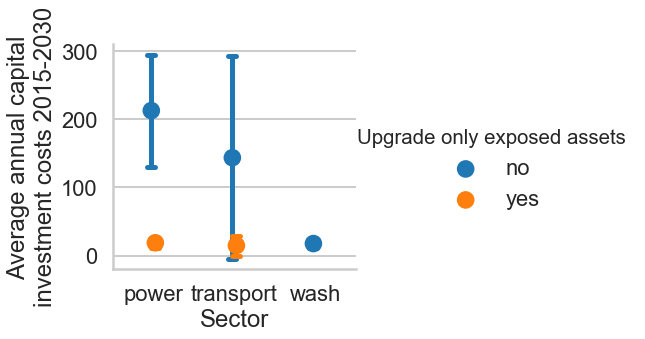

In [11]:
g = sns.catplot(x="sector",y="cost_bUSD_disc_annual",hue="exposed",dodge=True,ci='sd',join=False,\
              kind="point",capsize=0.1,data=all_sectors,errwidth=5, height=5, aspect=1.2,\
                  legend=False)

g.set_axis_labels("Sector", "Average annual capital\ninvestment costs 2015-2030")
g.add_legend(title="Upgrade only exposed assets")

In [12]:
test = all_sectors.set_index(["exposed","sector","description"]).cost_bUSD_disc_annual.unstack("exposed")

In [13]:
(test["yes"]/test["no"]).mean()

0.09753976379871333

In [14]:
wash_yes = all_sectors.loc[all_sectors.sector=="wash"].copy()

In [15]:
wash_yes['exposed']="yes"
wash_yes['cost_bUSD_disc_annual']=wash_yes['cost_bUSD_disc_annual']*(test["yes"]/test["no"]).mean()

In [16]:
all_sectors = all_sectors.append(wash_yes)

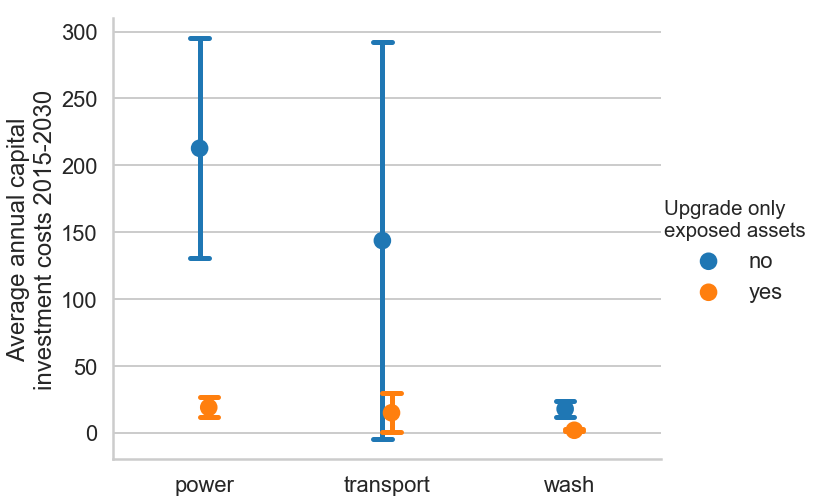

In [17]:
g = sns.catplot(x="sector",y="cost_bUSD_disc_annual",hue="exposed",dodge=True,ci='sd',join=False,\
              kind="point",capsize=0.1,data=all_sectors,errwidth=5, height=8, aspect=1.2,\
                  legend=False)

g.set_axis_labels("", "Average annual capital\ninvestment costs 2015-2030")
g.add_legend(title="Upgrade only\nexposed assets")

In [18]:
flood

,sector,cost_bUSD_disc_annual,exposed,scenario
0,flood,103,yes,best
1,flood,335,yes,max
2,flood,23,yes,min
3,flood,103,no,best
4,flood,335,no,max
5,flood,23,no,min


In [19]:
all_sectors_2 = all_sectors
sec = all_sectors_2.set_index(['sector','exposed','scenario']).cost_bUSD_disc_annual.unstack('sector')
sec['total'] = sec.sum(axis=1)
all_sectors_2 = sec.stack('sector').reset_index().rename(columns={0:'cost_bUSD_disc_annual'})

In [20]:
all_sectors_3 = all_sectors.append(flood)
sec = all_sectors_3.set_index(['sector','exposed','scenario']).cost_bUSD_disc_annual.unstack('sector')
sec['total'] = sec['wash']+sec['transport']+sec['power']
#sec['total and\nflood protection'] = sec['total']+sec['flood']
all_sectors_3 = sec.stack('sector').reset_index().rename(columns={0:'cost_bUSD_disc_annual'})

C:\ProgramData\Anaconda3\envs\Julie1\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [21]:
sec

sector            flood       power   transport       wash       total
exposed scenario                                                      
no      best      103.0  240.661235   71.744817  18.448343  330.854394
        max       335.0  296.489310  350.502501  24.502004  671.493815
        min        23.0  100.919645    8.592102  10.079453  119.591200
yes     best      103.0   19.630637    8.497516   1.799447   29.927600
        max       335.0   27.549049   35.074490   2.389920   65.013459
        min        23.0    9.298488    0.860103   0.983147   11.141738

C:\ProgramData\Anaconda3\envs\Julie1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


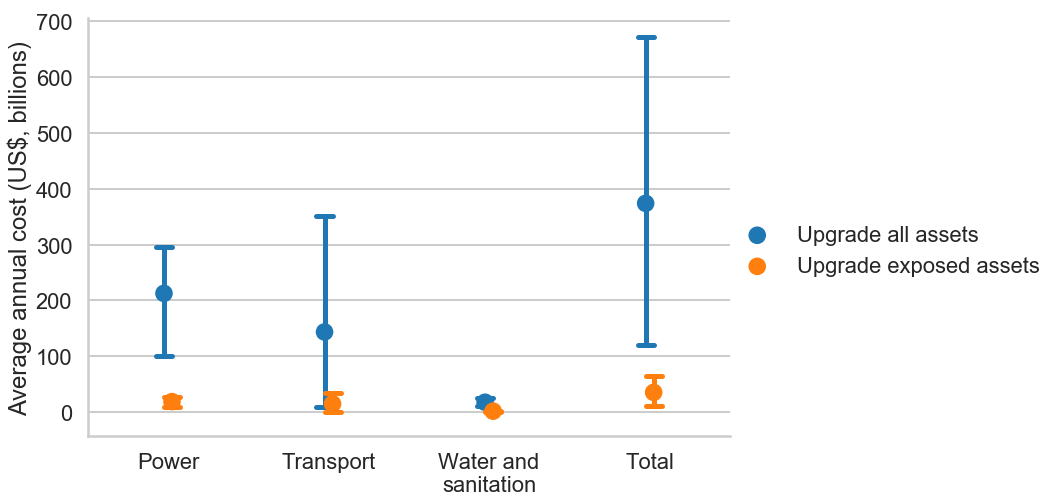

In [34]:
toplot = all_sectors_3[all_sectors_3.sector!='flood'].copy()
toplot['sector'] = toplot.sector.replace({'wash':'Water and\nsanitation','flood':'flood\nprotection','transport':'Transport',\
                                          'power':'Power','total':'Total'})
toplot['exposed'] = toplot.exposed.replace({'no':'Upgrade all assets','yes':'Upgrade exposed assets'})

g = sns.catplot(x="sector",y="cost_bUSD_disc_annual",hue="exposed",dodge=True,ci=100,join=False,capsize=0.1,errwidth=5,\
              kind="point",data=toplot,height=8, aspect=1.4,\
                  legend=False)
#dodge=True,ci='sd',join=False,capsize=0.1,errwidth=5, 
g.set_axis_labels("", "Average annual cost (US$, billions)")
g.add_legend(title="")

plt.savefig("C:\\Users\\WB451855\\WBG\\Stephane Hallegatte - RESILIENT INFRASTRUCTURE REPORT\\New structure\\figures\\resilience_cost.png",ddpi=300,bbox_inches="tight")
plt.savefig("C:\\Users\\WB451855\\WBG\\Stephane Hallegatte - RESILIENT INFRASTRUCTURE REPORT\\New structure\\figures\\resilience_cost.eps")

C:\ProgramData\Anaconda3\envs\Julie1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


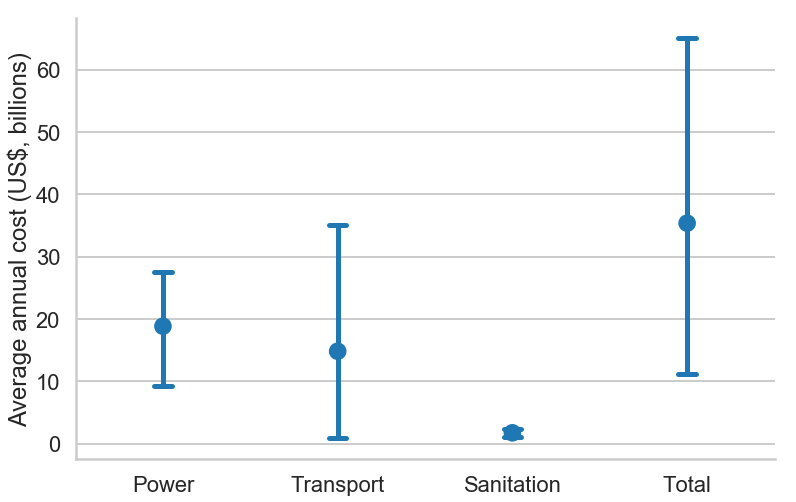

In [32]:
toplot = all_sectors_3[(all_sectors_3.sector!='flood')&(all_sectors_3.exposed=='yes')].copy()
toplot['sector'] = toplot.sector.replace({'wash':'Sanitation','flood':'flood\nprotection','transport':'Transport',\
                                          'power':'Power','total':'Total'})
toplot['exposed'] = toplot.exposed.replace({'no':'upgrade all assets','yes':'upgrade exposed assets'})

g = sns.catplot(x="sector",y="cost_bUSD_disc_annual",ci=100,join=False,capsize=0.1,errwidth=5,\
              kind="point",data=toplot,height=8, aspect=1.4,\
                  legend=False)
#dodge=True,ci='sd',join=False,capsize=0.1,errwidth=5, 
g.set_axis_labels("", "Average annual cost (US$, billions)")
g.add_legend(title="")

plt.savefig("C:\\Users\\WB451855\\WBG\\Stephane Hallegatte - RESILIENT INFRASTRUCTURE REPORT\\New structure\\figures\\resilience_cost_exposed.png",ddpi=300,bbox_inches="tight")
plt.savefig("C:\\Users\\WB451855\\WBG\\Stephane Hallegatte - RESILIENT INFRASTRUCTURE REPORT\\New structure\\figures\\resilience_cost_exposed.eps")